In [47]:
import os
import random
import splitfolders
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet import ResNet152
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix

In [2]:
for dirpath, dirnames, filenames in os.walk(r"C:\Users\DHRUV\Best Data Analysis Prep\Projects\brain_tumor_dataset"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'C:\Users\DHRUV\Best Data Analysis Prep\Projects\brain_tumor_dataset'.
There are 0 directories and 98 images in 'C:\Users\DHRUV\Best Data Analysis Prep\Projects\brain_tumor_dataset\no'.
There are 0 directories and 155 images in 'C:\Users\DHRUV\Best Data Analysis Prep\Projects\brain_tumor_dataset\yes'.


In [3]:
path = r"C:\Users\DHRUV\Best Data Analysis Prep\Projects\brain_tumor_dataset"

In [4]:
splitfolders.ratio(path, output="brain_splitted", seed=1337, ratio=(0.8, 0.1, 0.1)) 

Copying files: 253 files [00:00, 668.26 files/s]


In [5]:
final_path = r"C:\Users\DHRUV\Best Data Analysis Prep\Projects\brain_splitted"

In [6]:
for dirpath, dirnames, filenames in os.walk(final_path):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 3 directories and 0 images in 'C:\Users\DHRUV\Best Data Analysis Prep\Projects\brain_splitted'.
There are 2 directories and 0 images in 'C:\Users\DHRUV\Best Data Analysis Prep\Projects\brain_splitted\test'.
There are 0 directories and 11 images in 'C:\Users\DHRUV\Best Data Analysis Prep\Projects\brain_splitted\test\no'.
There are 0 directories and 16 images in 'C:\Users\DHRUV\Best Data Analysis Prep\Projects\brain_splitted\test\yes'.
There are 2 directories and 0 images in 'C:\Users\DHRUV\Best Data Analysis Prep\Projects\brain_splitted\train'.
There are 0 directories and 78 images in 'C:\Users\DHRUV\Best Data Analysis Prep\Projects\brain_splitted\train\no'.
There are 0 directories and 124 images in 'C:\Users\DHRUV\Best Data Analysis Prep\Projects\brain_splitted\train\yes'.
There are 2 directories and 0 images in 'C:\Users\DHRUV\Best Data Analysis Prep\Projects\brain_splitted\val'.
There are 0 directories and 9 images in 'C:\Users\DHRUV\Best Data Analysis Prep\Projects\brain_s

In [7]:
def view_random(target_dir, target_class):
  # Setup the target directory (We'll view the images from here)
  target_folder = target_dir + "/" + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}") # Show the shape of the image
  return img

In [8]:
train_dir = r"C:\Users\DHRUV\Best Data Analysis Prep\Projects\brain_splitted\train"
test_dir = r"C:\Users\DHRUV\Best Data Analysis Prep\Projects\brain_splitted\test"
val_dir = r"C:\Users\DHRUV\Best Data Analysis Prep\Projects\brain_splitted\val"

['4 no.jpg']
Image shape: (250, 201, 3)


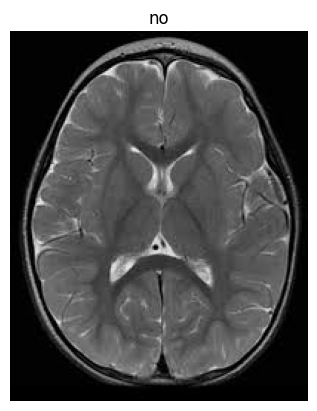

In [9]:
img = view_random(train_dir, "no")

In [10]:
img

array([[[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2],
        ...,
        [2, 2, 2],
        [2, 2, 2],
        [2, 2, 2]],

       [[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2],
        ...,
        [2, 2, 2],
        [2, 2, 2],
        [2, 2, 2]],

       [[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2],
        ...,
        [2, 2, 2],
        [2, 2, 2],
        [2, 2, 2]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [11]:
img.shape

(250, 201, 3)

In [12]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.3,
                                   horizontal_flip = True)
val_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale=1.255)

In [13]:
train_data = train_datagen.flow_from_directory(directory = train_dir, batch_size = 32, target_size = (256, 256), class_mode = "binary", seed = 42)
val_data = val_datagen.flow_from_directory(directory = val_dir, batch_size = 32, target_size = (256, 256), class_mode = "binary", seed = 42)
test_data = test_datagen.flow_from_directory(directory = test_dir, batch_size = 32, target_size = (256, 256), class_mode = "binary", seed = 42)

Found 202 images belonging to 2 classes.
Found 24 images belonging to 2 classes.
Found 27 images belonging to 2 classes.


In [14]:
model_1 = Sequential()

model_1.add(Conv2D(filters = 10, kernel_size=3, activation='relu', padding='same', input_shape = (256, 256, 3)))
model_1.add(Conv2D(10, 3, activation = "relu"))
model_1.add(MaxPool2D(pool_size=2, padding = "valid"))

model_1.add(Conv2D(10, 3, activation = "relu"))
model_1.add(Conv2D(10, 3, activation = "relu"))
model_1.add(MaxPool2D(2))

model_1.add(Flatten())
model_1.add(Dense(1, activation = "sigmoid"))

model_1.compile(loss="binary_crossentropy", optimizer = Adam(), metrics=["accuracy"])
history_1 = model_1.fit(train_data,
                       epochs = 10,
                       steps_per_epoch=len(train_data),
                       validation_data=val_data,
                       validation_steps=len(val_data))

Epoch 1/10
7/7 [==============================] - 14s 2s/step - loss: 0.6505 - accuracy: 0.5842 - val_loss: 0.6397 - val_accuracy: 0.6250
Epoch 2/10
7/7 [==============================] - 12s 2s/step - loss: 0.6426 - accuracy: 0.6139 - val_loss: 0.6335 - val_accuracy: 0.6250
Epoch 3/10
7/7 [==============================] - 11s 2s/step - loss: 0.6550 - accuracy: 0.6089 - val_loss: 0.6148 - val_accuracy: 0.6250
Epoch 4/10
7/7 [==============================] - 11s 2s/step - loss: 0.6066 - accuracy: 0.7030 - val_loss: 0.6047 - val_accuracy: 0.6667
Epoch 5/10
7/7 [==============================] - 12s 2s/step - loss: 0.6067 - accuracy: 0.6980 - val_loss: 0.6068 - val_accuracy: 0.6667
Epoch 6/10
7/7 [==============================] - 14s 2s/step - loss: 0.6631 - accuracy: 0.6733 - val_loss: 0.5949 - val_accuracy: 0.6667
Epoch 7/10
7/7 [==============================] - 12s 2s/step - loss: 0.5652 - accuracy: 0.7178 - val_loss: 0.5802 - val_accuracy: 0.6250
Epoch 8/10
7/7 [==================

In [15]:
model_1.evaluate(test_data)

1/1 [==============================] - 0s 424ms/step - loss: 58.4046 - accuracy: 0.7407


[58.40455627441406, 0.7407407164573669]

In [16]:
def plot_loss_curves(history):
  """
  Returns seperate loss curves for training and validation metrics
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))
  # Plot loss
  plt.plot(epochs, loss, label = "training_loss")
  plt.plot(epochs, val_loss, label = "val_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  # Plot the accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label = "Accuracy")
  plt.plot(epochs, val_accuracy, label = "val_accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend()

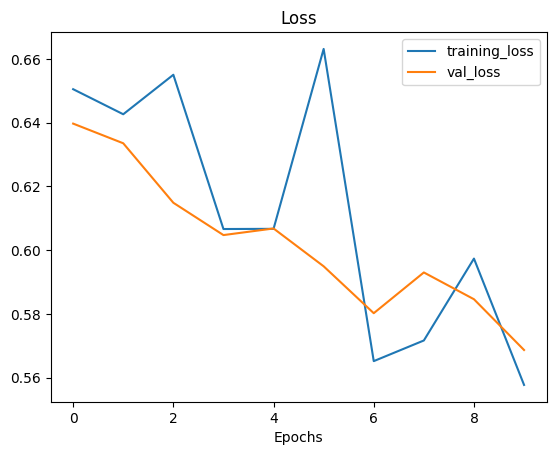

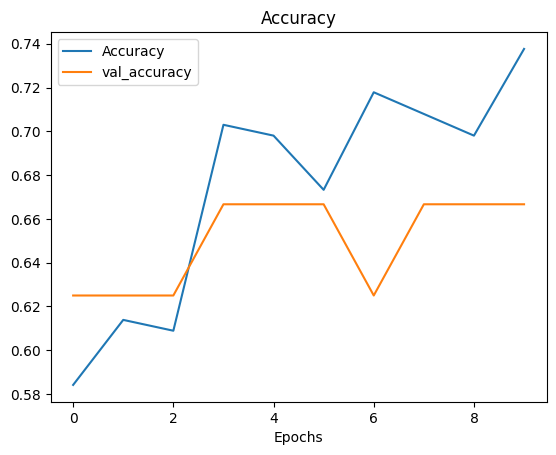

In [17]:
plot_loss_curves(history_1)

## Trying Transfer Learning

### VGG16

In [18]:
base_model = tf.keras.applications.vgg16.VGG16(include_top=False,
                                                weights='imagenet',
                                                input_shape=(256, 256, 3))
base_model.trainable = False

inputs = tf.keras.Input(shape=(256,256,3), name="input_layer")

x = base_model(inputs)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
outputs = tf.keras.layers.Dense(1, activation="softmax", name="output_layer")(x)
model_2 = tf.keras.Model(inputs, outputs)

model_2.compile(loss="binary_crossentropy",
                optimizer = Adam(),
                metrics=["accuracy"])

history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch = len(train_data),
                        validation_data = val_data,
                        validation_steps = len(val_data))

Epoch 1/5
7/7 [==============================] - 67s 11s/step - loss: 0.9928 - accuracy: 0.6139 - val_loss: 0.8887 - val_accuracy: 0.6250
Epoch 2/5
7/7 [==============================] - 63s 9s/step - loss: 0.8237 - accuracy: 0.6139 - val_loss: 0.7496 - val_accuracy: 0.6250
Epoch 3/5
7/7 [==============================] - 60s 8s/step - loss: 0.7300 - accuracy: 0.6139 - val_loss: 0.6772 - val_accuracy: 0.6250
Epoch 4/5
7/7 [==============================] - 60s 8s/step - loss: 0.6679 - accuracy: 0.6139 - val_loss: 0.6581 - val_accuracy: 0.6250
Epoch 5/5
7/7 [==============================] - 72s 12s/step - loss: 0.6547 - accuracy: 0.6139 - val_loss: 0.6595 - val_accuracy: 0.6250


In [19]:
model_2.evaluate(test_data)

1/1 [==============================] - 10s 10s/step - loss: 8.1924 - accuracy: 0.5926


[8.192395210266113, 0.5925925970077515]

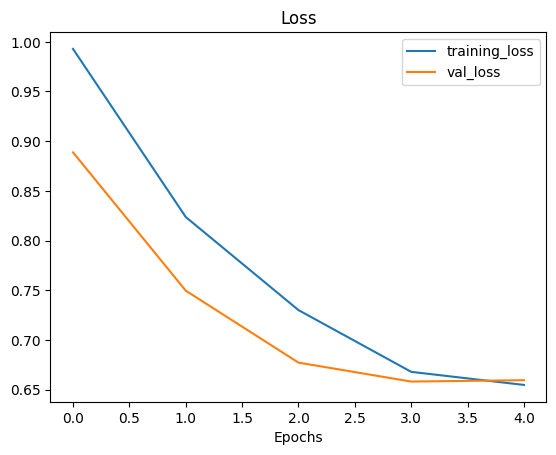

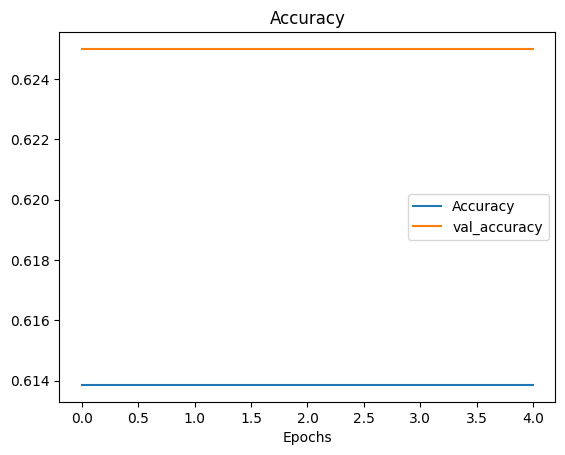

In [20]:
plot_loss_curves(history_2)

In [21]:
model_3 = Sequential()
model_3.add(base_model)

model_3.add(Conv2D(16, (3,3),1, activation='relu', padding='same'))
model_3.add(MaxPool2D())

model_3.add(Conv2D(32, (3,3),1, activation='relu', padding='same'))
model_3.add(MaxPool2D())

model_3.add(Conv2D(16, (3,3),1, activation='relu', padding='same'))
model_3.add(MaxPool2D())

model_3.add(Flatten())

model_3.add(Dense(256, activation='relu'))
model_3.add(Dense(1, activation='sigmoid'))


model_3.layers[0].trainable = False


model_3.compile(optimizer = Adam(),
                loss="binary_crossentropy",
                metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history_3 = model_3.fit(train_data,
                        epochs = 30,
                        validation_data=val_data,
                        callbacks=early_stopping)

Epoch 1/30
7/7 [==============================] - 79s 12s/step - loss: 0.6651 - accuracy: 0.5842 - val_loss: 0.6591 - val_accuracy: 0.6250
Epoch 2/30
7/7 [==============================] - 66s 9s/step - loss: 0.6423 - accuracy: 0.6139 - val_loss: 0.6225 - val_accuracy: 0.6250
Epoch 3/30
7/7 [==============================] - 67s 10s/step - loss: 0.6065 - accuracy: 0.6436 - val_loss: 0.5858 - val_accuracy: 0.7083
Epoch 4/30
7/7 [==============================] - 71s 10s/step - loss: 0.5688 - accuracy: 0.7030 - val_loss: 0.4890 - val_accuracy: 0.8333
Epoch 5/30
7/7 [==============================] - 76s 10s/step - loss: 0.5003 - accuracy: 0.7723 - val_loss: 0.5988 - val_accuracy: 0.7083
Epoch 6/30
7/7 [==============================] - 78s 11s/step - loss: 0.4512 - accuracy: 0.7723 - val_loss: 0.3988 - val_accuracy: 0.7917
Epoch 7/30
7/7 [==============================] - 77s 11s/step - loss: 0.4128 - accuracy: 0.8465 - val_loss: 0.6157 - val_accuracy: 0.7083
Epoch 8/30
7/7 [============

In [22]:
model_3.evaluate(test_data)

1/1 [==============================] - 7s 7s/step - loss: 11.6261 - accuracy: 0.7407


[11.62606143951416, 0.7407407164573669]

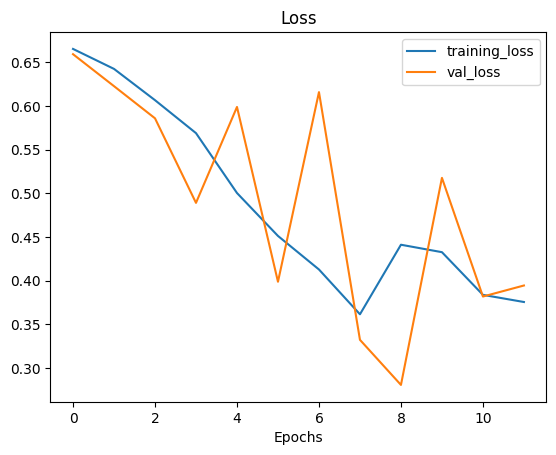

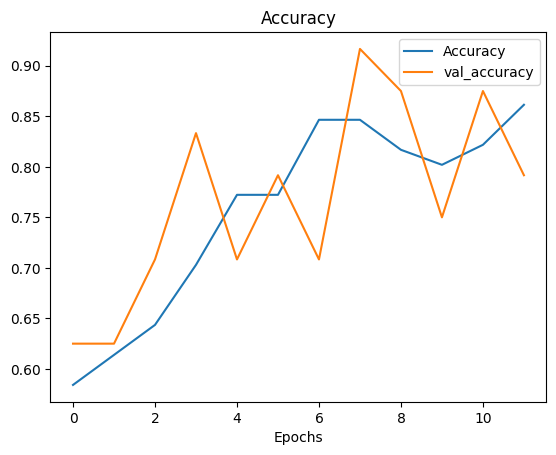

In [23]:
plot_loss_curves(history_3)

Upon manually watching the images, I found that Image 19 in NO directory was different. Different as in all the scans are axial but this Image 19 is coronal. This might affect the model's learning patterns. So, let's remove it.

In [24]:
coronal = r"C:\Users\DHRUV\Best Data Analysis Prep\Projects\brain_tumor_dataset\no\19 no.jpg"

# Check if the file exists before attempting to delete
if os.path.exists(coronal):
    # Delete the image file
    os.remove(coronal)
    print(f"The image {coronal} has been deleted.")
else:
    print(f"The image {coronal} does not exist.")

The image C:\Users\DHRUV\Best Data Analysis Prep\Projects\brain_tumor_dataset\no\19 no.jpg has been deleted.


In [25]:
splitfolders.ratio(path, output="brain_splitted_deleted", seed=1337, ratio=(.8, 0.1,0.1)) 

Copying files: 252 files [00:00, 424.46 files/s]


In [26]:
train_dir = r"C:\Users\DHRUV\Best Data Analysis Prep\Projects\brain_splitted_deleted\train"
test_dir = r"C:\Users\DHRUV\Best Data Analysis Prep\Projects\brain_splitted_deleted\test"
val_dir = r"C:\Users\DHRUV\Best Data Analysis Prep\Projects\brain_splitted_deleted\val"

In [27]:
train_data_d = train_datagen.flow_from_directory(directory = train_dir, batch_size = 32, target_size = (256, 256), class_mode = "binary", seed = 42)
val_data_d = val_datagen.flow_from_directory(directory = val_dir, batch_size = 32, target_size = (256, 256), class_mode = "binary", seed = 42)
test_data_d = test_datagen.flow_from_directory(directory = test_dir, batch_size = 32, target_size = (256, 256), class_mode = "binary", seed = 42)

Found 201 images belonging to 2 classes.
Found 24 images belonging to 2 classes.
Found 27 images belonging to 2 classes.


In [28]:
model_4 = Sequential()
model_4.add(base_model)

model_4.add(Conv2D(16, (3,3),1, activation='relu', padding='same'))
model_4.add(MaxPool2D())

model_4.add(Conv2D(32, (3,3),1, activation='relu', padding='same'))
model_4.add(MaxPool2D())

model_4.add(Conv2D(16, (3,3),1, activation='relu', padding='same'))
model_4.add(MaxPool2D())

model_4.add(Flatten())

model_4.add(Dense(256, activation='relu'))
model_4.add(Dense(1, activation='sigmoid'))

# Freeze the weights of the pre-trained model_4
model_4.layers[0].trainable = False

# Compile the model_4 with appropriate loss function, optimizer and metrics
model_4.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


In [29]:
history_4 = model_4.fit(train_data_d,
                        epochs = 30,
                        validation_data=val_data_d,
                        callbacks=early_stopping)

Epoch 1/30
7/7 [==============================] - 63s 9s/step - loss: 0.6709 - accuracy: 0.6169 - val_loss: 0.6535 - val_accuracy: 0.6250
Epoch 2/30
7/7 [==============================] - 61s 9s/step - loss: 0.6574 - accuracy: 0.6169 - val_loss: 0.6433 - val_accuracy: 0.6250
Epoch 3/30
7/7 [==============================] - 64s 10s/step - loss: 0.6447 - accuracy: 0.6169 - val_loss: 0.6179 - val_accuracy: 0.6250
Epoch 4/30
7/7 [==============================] - 66s 9s/step - loss: 0.6011 - accuracy: 0.6318 - val_loss: 0.5628 - val_accuracy: 0.7083
Epoch 5/30
7/7 [==============================] - 61s 9s/step - loss: 0.5588 - accuracy: 0.7015 - val_loss: 0.4659 - val_accuracy: 0.8750
Epoch 6/30
7/7 [==============================] - 61s 9s/step - loss: 0.5642 - accuracy: 0.7463 - val_loss: 0.4593 - val_accuracy: 0.8750
Epoch 7/30
7/7 [==============================] - 62s 9s/step - loss: 0.4650 - accuracy: 0.8060 - val_loss: 0.4337 - val_accuracy: 0.7500
Epoch 8/30
7/7 [=================

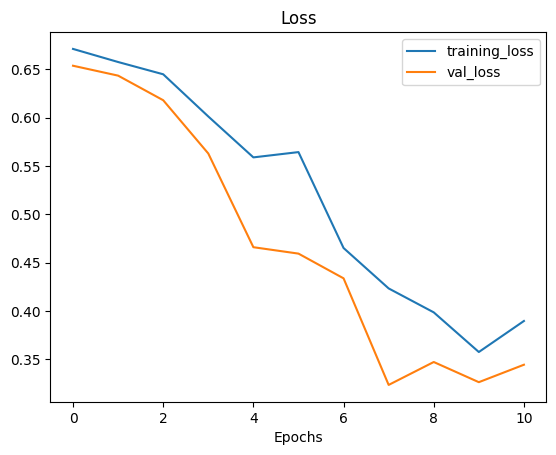

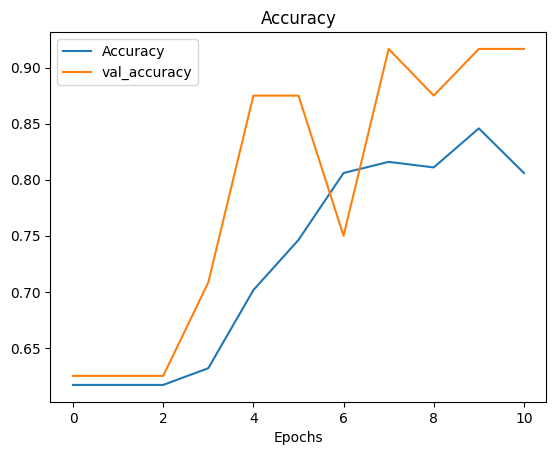

In [30]:
plot_loss_curves(history_4)

In [31]:
model_4.evaluate(test_data_d)

1/1 [==============================] - 7s 7s/step - loss: 24.9225 - accuracy: 0.4815


[24.922536849975586, 0.48148149251937866]

In [32]:
model_4.evaluate(val_data_d)

1/1 [==============================] - 6s 6s/step - loss: 0.3235 - accuracy: 0.9167


[0.3234645128250122, 0.9166666865348816]

In [33]:
model_5 = Sequential()
model_5.add(base_model)

model_5.add(Conv2D(16, (3,3),1, activation='relu', padding='same'))
model_5.add(MaxPool2D())

model_5.add(Conv2D(32, (3,3),1, activation='relu', padding='same'))
model_5.add(MaxPool2D())

model_5.add(Flatten())

model_5.add(Dense(256, activation='relu'))
model_5.add(Dense(1, activation='sigmoid'))

# Freeze the weights of the pre-trained model_5
model_5.layers[0].trainable = False

# Compile the model_3 with appropriate loss function, optimizer and metrics
model_5.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history_5 = model_5.fit(train_data_d,
                        epochs = 30,
                        validation_data=val_data_d,
                        callbacks=early_stopping)

Epoch 1/30
7/7 [==============================] - 61s 8s/step - loss: 0.6988 - accuracy: 0.6368 - val_loss: 0.6453 - val_accuracy: 0.6250
Epoch 2/30
7/7 [==============================] - 59s 8s/step - loss: 0.6318 - accuracy: 0.6269 - val_loss: 0.6169 - val_accuracy: 0.6250
Epoch 3/30
7/7 [==============================] - 61s 9s/step - loss: 0.5760 - accuracy: 0.7164 - val_loss: 0.5390 - val_accuracy: 0.7083
Epoch 4/30
7/7 [==============================] - 60s 9s/step - loss: 0.5117 - accuracy: 0.7363 - val_loss: 0.4935 - val_accuracy: 0.7500
Epoch 5/30
7/7 [==============================] - 60s 10s/step - loss: 0.5442 - accuracy: 0.6915 - val_loss: 0.6530 - val_accuracy: 0.6667
Epoch 6/30
7/7 [==============================] - 60s 8s/step - loss: 0.4888 - accuracy: 0.8010 - val_loss: 0.4092 - val_accuracy: 0.8333
Epoch 7/30
7/7 [==============================] - 62s 9s/step - loss: 0.4424 - accuracy: 0.8109 - val_loss: 0.3585 - val_accuracy: 0.8750
Epoch 8/30
7/7 [=================

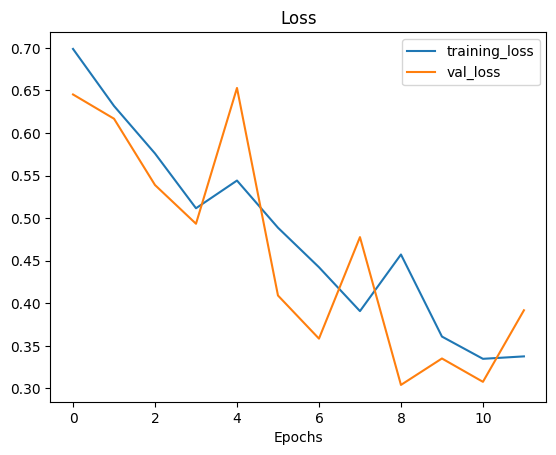

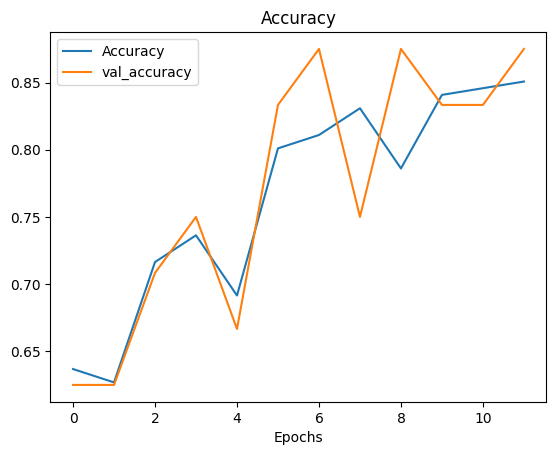

In [34]:
plot_loss_curves(history_5)

In [35]:
model_5.evaluate(test_data_d)

1/1 [==============================] - 7s 7s/step - loss: 21.9001 - accuracy: 0.4815


[21.900068283081055, 0.48148149251937866]

In [36]:
model_6 = Sequential()
model_6.add(base_model)

model_6.add(Conv2D(16, (3,3),1, activation='relu', padding='same'))
model_6.add(MaxPool2D())

model_6.add(Flatten())

model_6.add(Dense(256, activation='relu'))
model_6.add(Dense(1, activation='sigmoid'))

# Freeze the weights of the pre-trained model_6
model_6.layers[0].trainable = False

# Compile the model_3 with appropriate loss function, optimizer and metrics
model_6.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


In [37]:
history_6 = model_6.fit(train_data_d,
                        epochs = 30,
                        validation_data=val_data_d,
                        callbacks=early_stopping)

Epoch 1/30
7/7 [==============================] - 60s 8s/step - loss: 0.7216 - accuracy: 0.5970 - val_loss: 0.6964 - val_accuracy: 0.3750
Epoch 2/30
7/7 [==============================] - 60s 8s/step - loss: 0.6594 - accuracy: 0.6070 - val_loss: 0.6058 - val_accuracy: 0.6250
Epoch 3/30
7/7 [==============================] - 63s 9s/step - loss: 0.5936 - accuracy: 0.6766 - val_loss: 0.5598 - val_accuracy: 0.6250
Epoch 4/30
7/7 [==============================] - 69s 11s/step - loss: 0.5370 - accuracy: 0.7214 - val_loss: 0.4444 - val_accuracy: 0.8333
Epoch 5/30
7/7 [==============================] - 67s 10s/step - loss: 0.5148 - accuracy: 0.7363 - val_loss: 0.4916 - val_accuracy: 0.7083
Epoch 6/30
7/7 [==============================] - 64s 9s/step - loss: 0.4987 - accuracy: 0.7562 - val_loss: 0.3717 - val_accuracy: 0.8333
Epoch 7/30
7/7 [==============================] - 63s 9s/step - loss: 0.4129 - accuracy: 0.8060 - val_loss: 0.3610 - val_accuracy: 0.8750
Epoch 8/30
7/7 [================

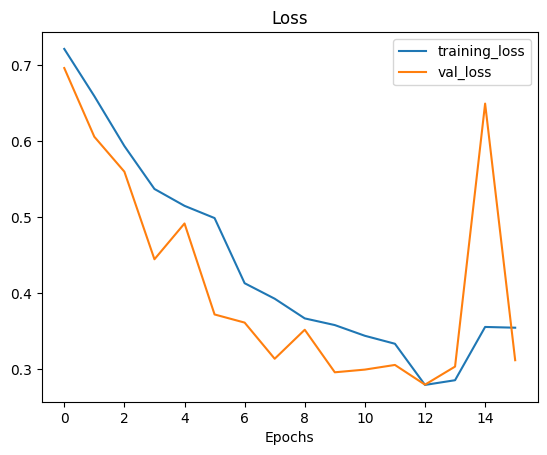

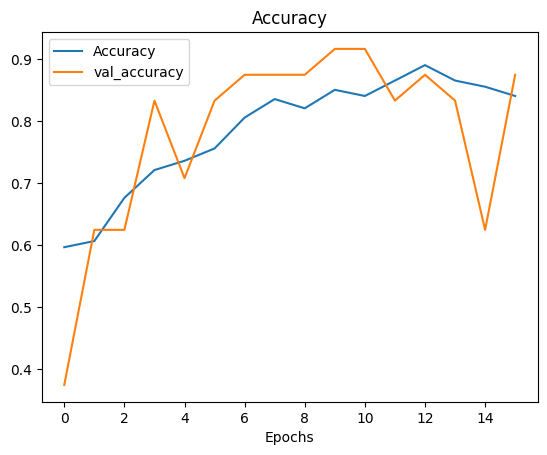

In [38]:
plot_loss_curves(history_6)

In [39]:
model_6.evaluate(test_data_d)

1/1 [==============================] - 15s 15s/step - loss: 7.0134 - accuracy: 0.8148


[7.013386249542236, 0.8148148059844971]

In [40]:
tp_count, fp_count, tn_count, fn_count = 0, 0, 0, 0

for i in range(len(test_data_d)):
    # Get the next batch
    X, y = test_data.next()
    
    y_pred = model_5.predict(X)
    
    # Round the probabilities to get binary predictions (0 or 1)
    y_pred_binary = np.round(y_pred).astype(int)

    # Calculate true positive, false positive, true negative, and false negative counts
    for true_label, pred_label in zip(y, y_pred_binary):
        if true_label == 1 and pred_label == 1:
            tp_count += 1
        elif true_label == 0 and pred_label == 1:
            fp_count += 1
        elif true_label == 1 and pred_label == 0:
            fn_count += 1
        elif true_label == 0 and pred_label == 0:
            tn_count += 1

# Print confusion matrix and performance metrics
print(f'Confusion Matrix:')
print(f'True Negatives: {tn_count}, False Positives: {fp_count}')
print(f'False Negatives: {fn_count}, True Positives: {tp_count}')


1/1 [==============================] - 10s 10s/step
Confusion Matrix:
True Negatives: 10, False Positives: 1
False Negatives: 14, True Positives: 2


In [51]:
tp_count, fp_count, tn_count, fn_count = 0, 0, 0, 0

for i in range(len(test_data_d)):
    # Get the next batch
    X, y = test_data.next()
    
    y_pred = model_6.predict(X)
    
    # Round the probabilities to get binary predictions (0 or 1)
    y_pred_binary = np.round(y_pred).astype(int)

    # Calculate true positive, false positive, true negative, and false negative counts
    for true_label, pred_label in zip(y, y_pred_binary):
        if true_label == 1 and pred_label == 1:
            tp_count += 1
        elif true_label == 0 and pred_label == 1:
            fp_count += 1
        elif true_label == 1 and pred_label == 0:
            fn_count += 1
        elif true_label == 0 and pred_label == 0:
            tn_count += 1

# Print confusion matrix and performance metrics
print(f'Confusion Matrix:')
print(f'True Negatives: {tn_count}, False Positives: {fp_count}')
print(f'False Negatives: {fn_count}, True Positives: {tp_count}')


1/1 [==============================] - 5s 5s/step
Confusion Matrix:
True Negatives: 10, False Positives: 1
False Negatives: 3, True Positives: 13


In [41]:
model_7 = Sequential()
model_7.add(base_model)

model_7.add(Conv2D(16, (3,3),1, activation='relu', padding='same'))
model_7.add(MaxPool2D())

model_7.add(Conv2D(32, (3,3),1, activation='relu', padding='same'))
model_7.add(MaxPool2D())

model_7.add(Flatten())

model_7.add(Dense(256, activation='relu'))
model_7.add(Dense(10, activation ="relu"))
model_7.add(Dense(1, activation='sigmoid'))

# Freeze the weights of the pre-trained model_7
model_7.layers[0].trainable = False

# Compile the model_3 with appropriate loss function, optimizer and metrics
model_7.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history_7 = model_7.fit(train_data_d,
                        epochs = 30,
                        validation_data=val_data_d,
                        callbacks=early_stopping)


Epoch 1/30
7/7 [==============================] - 66s 10s/step - loss: 0.7779 - accuracy: 0.4527 - val_loss: 0.6634 - val_accuracy: 0.6250
Epoch 2/30
7/7 [==============================] - 87s 13s/step - loss: 0.6767 - accuracy: 0.6169 - val_loss: 0.6666 - val_accuracy: 0.6250
Epoch 3/30
7/7 [==============================] - 94s 13s/step - loss: 0.6469 - accuracy: 0.6169 - val_loss: 0.6489 - val_accuracy: 0.6250
Epoch 4/30
7/7 [==============================] - 80s 11s/step - loss: 0.6440 - accuracy: 0.6169 - val_loss: 0.6302 - val_accuracy: 0.6250
Epoch 5/30
7/7 [==============================] - 74s 10s/step - loss: 0.6339 - accuracy: 0.6169 - val_loss: 0.6117 - val_accuracy: 0.6250
Epoch 6/30
7/7 [==============================] - 72s 10s/step - loss: 0.5928 - accuracy: 0.6816 - val_loss: 0.5667 - val_accuracy: 0.6667
Epoch 7/30
7/7 [==============================] - 76s 11s/step - loss: 0.5466 - accuracy: 0.7363 - val_loss: 0.5065 - val_accuracy: 0.7500
Epoch 8/30
7/7 [===========

In [42]:
model_7.evaluate(test_data_d)

1/1 [==============================] - 9s 9s/step - loss: 20.9166 - accuracy: 0.5556


[20.916601181030273, 0.5555555820465088]

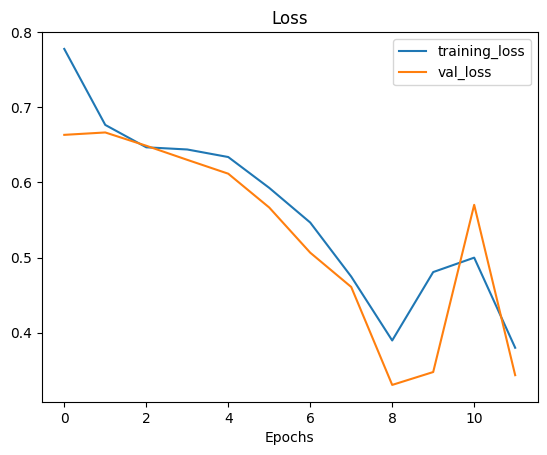

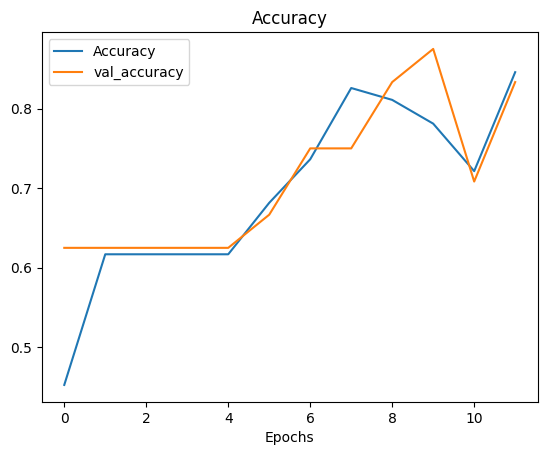

In [43]:
plot_loss_curves(history_7)

### ResNet

In [48]:
base_model_resnet = ResNet152(include_top=False,
                              weights='imagenet',
                              input_shape=(256, 256, 3))
base_model_resnet.trainable = False

234698864/234698864 [==============================] - 70s 0us/step


In [50]:
model_8 = Sequential()
model_8.add(base_model_resnet)

model_8.add(Conv2D(16, (3,3),1, activation='relu', padding='same'))
model_8.add(MaxPool2D())

model_8.add(Conv2D(32, (3,3),1, activation='relu', padding='same'))
model_8.add(MaxPool2D())

model_8.add(Conv2D(16, (3,3),1, activation='relu', padding='same'))
model_8.add(MaxPool2D())

model_8.add(Flatten())

model_8.add(Dense(256, activation='relu'))
model_8.add(Dense(1, activation='sigmoid'))


model_8.layers[0].trainable = False


model_8.compile(optimizer = Adam(),
                loss="binary_crossentropy",
                metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history_8 = model_8.fit(train_data,
                        epochs = 30,
                        validation_data=val_data,
                        callbacks=early_stopping)

Epoch 1/30
7/7 [==============================] - 87s 11s/step - loss: 0.7149 - accuracy: 0.5099 - val_loss: 0.6692 - val_accuracy: 0.6250
Epoch 2/30
7/7 [==============================] - 64s 9s/step - loss: 0.6753 - accuracy: 0.6139 - val_loss: 0.6674 - val_accuracy: 0.6250
Epoch 3/30
7/7 [==============================] - 64s 9s/step - loss: 0.6682 - accuracy: 0.6139 - val_loss: 0.6649 - val_accuracy: 0.6250
Epoch 4/30
7/7 [==============================] - 68s 10s/step - loss: 0.6644 - accuracy: 0.6139 - val_loss: 0.6636 - val_accuracy: 0.6250
Epoch 5/30
7/7 [==============================] - 66s 9s/step - loss: 0.6669 - accuracy: 0.6139 - val_loss: 0.6609 - val_accuracy: 0.6250
Epoch 6/30
7/7 [==============================] - 66s 9s/step - loss: 0.6502 - accuracy: 0.6139 - val_loss: 0.6808 - val_accuracy: 0.6250
Epoch 7/30
7/7 [==============================] - 67s 9s/step - loss: 0.6446 - accuracy: 0.6139 - val_loss: 0.6567 - val_accuracy: 0.6250
Epoch 8/30
7/7 [================